In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_train = pd.read_table("../train_metalnet.tsv")
df_test = pd.read_table("../test_metalnet.tsv")
df = pd.concat([df_train, df_test])

## distribution of metal binding residue annotation

In [2]:
def count_resi_anno_to_num(df):
    metal_sites = set(zip(df['pdb'], df['metal_chain'], df['metal_resi'], df['resi_ndb_seq_can_num'])) # we count residue number, not site number
    metal2num = dict()
    for i in metal_sites:
        _, _, resi, _ = i
        if resi in metal2num.keys():
            metal2num[resi] += 1
        else:
            metal2num[resi] = 1
    data = list(metal2num.items())
    data.sort(key=lambda x: x[1], reverse=True)
    x = [i[0] for i in data]
    y = [i[1] for i in data]
    return x, y

x, y = count_resi_anno_to_num(df)
x
y

['ZN', 'CA', 'MG', 'SF4', 'MN', 'FE', 'NI', 'CU', 'FES', 'CO', 'F3S']

[9319, 5118, 1487, 1016, 976, 798, 487, 416, 361, 148, 84]

In [3]:
x_train_old = ['ZN', 'CA', 'MG', 'MN', 'FE', 'NI', 'SF4', 'CO', 'CU', 'FES']
y_train_old = [1261, 680, 293, 167, 111, 103, 101, 63, 61, 34]# from paper https://doi.org/10.1038/s41589-022-01223-z
train_old_metal2num = dict(zip(x_train_old, y_train_old))
y_train_old = [train_old_metal2num[i] if i in train_old_metal2num.keys() else 0 for i in x]
y_train_old

[1261, 680, 293, 101, 167, 111, 103, 61, 34, 63, 0]

In [4]:
import numpy as np

y = np.log10(y)
y_train_old = np.log10(y_train_old)

/tmp/ipykernel_21490/1415502877.py:4: RuntimeWarning: divide by zero encountered in log10
  y_train_old = np.log10(y_train_old)


Text(0, 0.5, 'Number of metal-binding residues')

Text(0.5, 0, 'Metal type')

([<matplotlib.axis.XTick at 0x7f566c50c7c0>,
 [Text(0, 0, 'ZN'),
  Text(1, 0, 'CA'),
  Text(2, 0, 'MG'),
  Text(3, 0, 'SF4'),
  Text(4, 0, 'MN'),
  Text(5, 0, 'FE'),
  Text(6, 0, 'NI'),
  Text(7, 0, 'CU'),
  Text(8, 0, 'FES'),
  Text(9, 0, 'CO'),
  Text(10, 0, 'F3S')])

([<matplotlib.axis.YTick at 0x7f566c44a3a0>,
 [Text(0, 0, '0'),
  Text(0, 1, '$10^1$'),
  Text(0, 2, '$10^2$'),
  Text(0, 3, '$10^3$'),
  Text(0, 4, '$10^4$')])

<BarContainer object of 11 artists>

<BarContainer object of 11 artists>

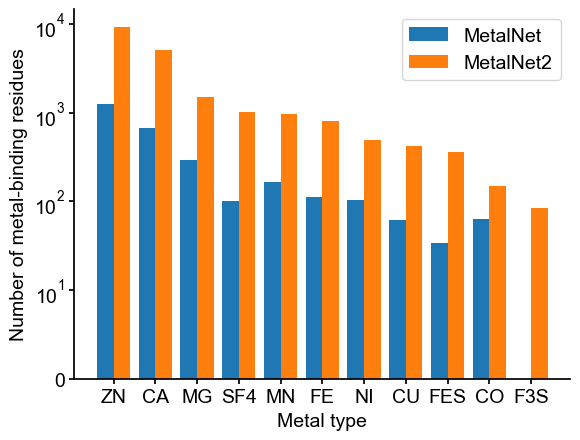

In [5]:
plt.style.use(f"{PROJECT_DIR}/asset/metalnet.mplstyle")

plt.ylabel("Number of metal-binding residues")
plt.xlabel("Metal type")
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

coor_x = np.arange(len(x))
plt.xticks(coor_x, labels=x)
plt.yticks([0, 1, 2, 3, 4], labels=["0", "$10^1$", "$10^2$", "$10^3$", "$10^4$"])

width = 0.4
plt.bar(coor_x - width / 2, y_train_old, width=width)
plt.bar(coor_x + width / 2, y, width=width)

plt.legend(
    ['MetalNet', 'MetalNet2'], 
    bbox_to_anchor=(1,1), 
    loc='upper right', 
)
plt.savefig("./fig/distribution_metal_binding_resi_annotation.pdf", bbox_inches="tight", transparent=True)